In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = pd.read_excel('all_tags.xlsx')
data

,id,document,tag,content
0,6518042,Numail _ David Transcript.pdf,Education,so how did I end up in education? That wasn't ...
1,6518044,Numail _ David Transcript.pdf,Education,I loved to be in a primary school loves the im...
2,6518046,Numail _ David Transcript.pdf,Education,"And, yeah, I mean, I always say I think teache..."
3,6518053,Numail _ David Transcript.pdf,Career transition,"So in terms of training on digital resources, ..."
4,6530422,Numail _ David Transcript.pdf,Career transition,They were probably a little bit behind where o...
...,...,...,...,...
297,6609644,Joe Newell Interview.pdf,Communication,one of the people in my team who was Junior wa...
298,6609650,Joe Newell Interview.pdf,Company culture,"And then in Asia, in Jakarta is similar but pe..."
299,6609650,Joe Newell Interview.pdf,Communication,"And then in Asia, in Jakarta is similar but pe..."
300,6609680,Joe Newell Interview.pdf,Company culture,"So like in our team in Singapore, we have like..."


In [3]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each content in the DataFrame
data['sentiments'] = data['content'].apply(lambda x: sia.polarity_scores(x))
data['compound'] = data['sentiments'].apply(lambda x: x['compound'])
data['sentiment_type'] = data['compound'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

In [4]:
sentiment_summary = data.groupby(['tag', 'sentiment_type']).size().unstack(fill_value=0)
print(sentiment_summary)

sentiment_type                  negative  neutral  positive
tag                                                        
Autonomy                               0        0         3
Capitalism                             1        0         6
Career transition                      0        0        12
Challenging assumptions                1        0         6
Chief of Staff                         0        1         3
Churn                                  1        0         3
Co-founders compatibility              0        0        10
Communication                          0        0         5
Company culture                        1        0        28
Cross-functional collaboration         1        0         3
Culture Fit                            2        0         7
Education                              1        1         5
Equity                                 0        0         1
Exploration vs Exploitation            1        0         9
Flexibility                            0

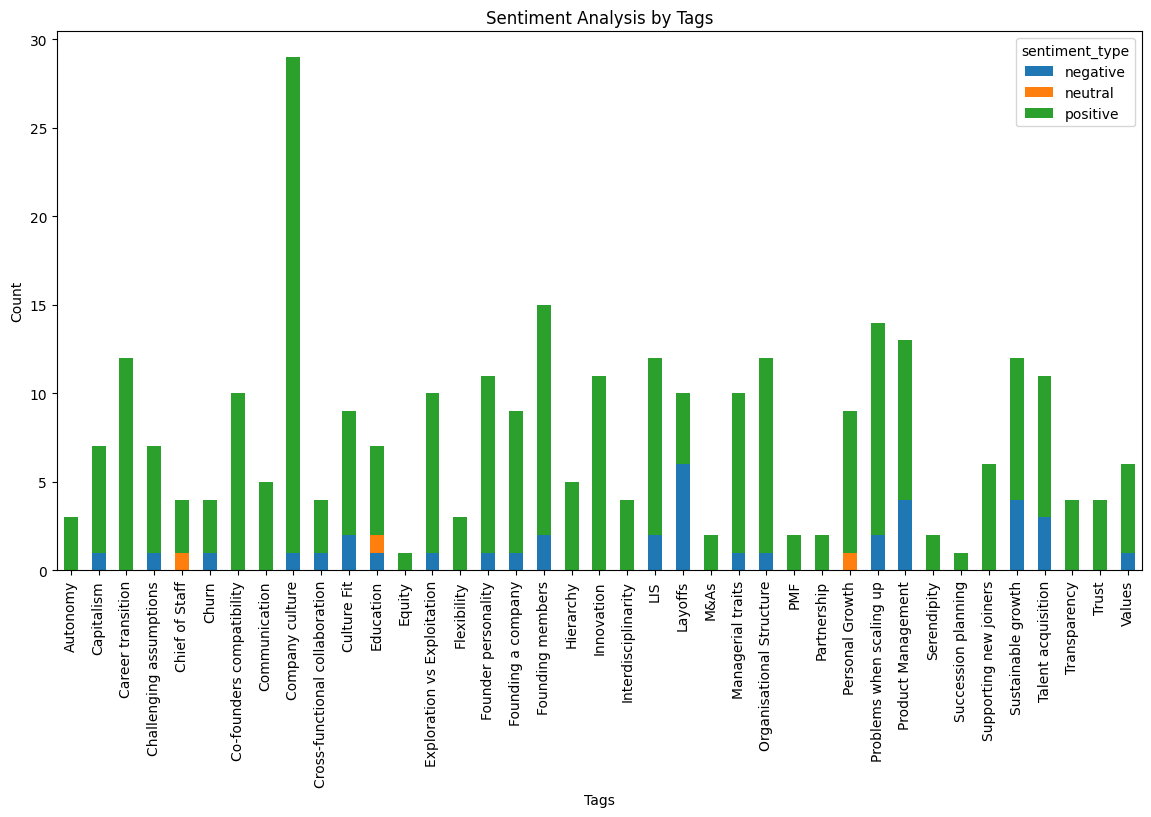

In [5]:
import matplotlib.pyplot as plt

sentiment_summary.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Analysis by Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [6]:
def manual_check(index, data):
    # Display the content and current sentiment
    print("Content:", data.loc[index, 'content'])
    print("Current Sentiment:", data.loc[index, 'sentiment_type'])

In [7]:
manual_check(299, data)

Content: And then in Asia, in Jakarta is similar but people are very they're very agreeable. Even Even to the point where they'l say yes, when they mean no. So like, you'l get you'l get the situation where people wil be. Did you do this? Yes. And they wouldn't have done it, but they don't want to say that. So it's quite you need to real y get through to like, asking the right questions doing in the right context to get to sometimes the truth
Current Sentiment: positive


In [8]:
def manual_check(tag, data):
    # Display the content and sentiment for the given tag
    tag_data = data[data['tag'] == tag]
    if not tag_data.empty:
        print("Sentiment(s) and Content(s) for tag '{}':".format(tag))
        for index, row in tag_data.iterrows():
            print("Content:", row['content'])
            print("Sentiment:", row['sentiment_type'])
            print()  # Adding a new line for better readability between entries
    else:
        print("No content found for tag '{}'.".format(tag))

In [9]:
manual_check('LIS', data)

Sentiment(s) and Content(s) for tag 'LIS':
Content: And that's, I think it's that's why if you take LIS, we are sort of between the 30 and we're going into the I would say the third stage, if you have 10 people, 30 people 30 plus people. One year sort of 30 to 40 people is never a clear cut between 30 and 40 people, you have to have like no strategy and you have some but they leader management layer and then you and typical y use gets quite a lot of churn, a lot of people leaving and if you have either leaving because they feel lost or they get kicked out
Sentiment: negative

Content: never a clear cut between 30 and 40 people, you have to have like no strategy and you have some but they leader management layer and then you and typical y use gets quite a lot of churn, a lot of people leaving and if you have either leaving because they feel lost or they get kicked out there's a big difference them like where where LIS is we are unlike most of the startups our business is very predictabl

In [10]:
manual_check('Layoffs', data)

Sentiment(s) and Content(s) for tag 'Layoffs':
Content: Yeah, so you're working and you're doing a good job and but you can't promote. Yeah, so you could give them a new title. But after a while, they realise that title doesn't mean anything. Yeah. And then lo and behold, we took too long at it. So we had to kick out 1/3 of the staff and then so it goes up and down like what do you then do if you're evil, or you're clever depending on how you look at it, when you hit realise that it's not growing as fast as you can you cut your losses. You fire the last chunk of people, because it gives you a longer runway to then also say what that person is in a class we keep him but she's a b minus.
Sentiment: negative

Content: you have to cut off one leg and then it wil grow out again. Yeah, but if you didn't, you may have Keylogger on you, then you know, you die. And that's a good analogy. Yeah. Because that's, you know, it's what happens, because you don't hit your numbers and you predicted to h

In [11]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()